# FEEDBACK

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import tellurium as te

# Two species system

In [2]:
a22, a23, a32, a33, b2, b3, x, x2, x3 = sp.symbols("a22, a23, a32, a33, b2, b3, x, x2, x3")

In [3]:
A2 = sp.Matrix([[a22, a23], [a32, a33]])
b2 = sp.Matrix([b2, b3])
x = sp.Matrix([x2, x3])
A2, b2, x

(Matrix([
 [a22, a23],
 [a32, a33]]),
 Matrix([
 [b2],
 [b3]]),
 Matrix([
 [x2],
 [x3]]))

In [4]:
sp.solve(A2*x - b2, x)

{x2: (-a23*b3 + a33*b2)/(a22*a33 - a23*a32),
 x3: (a22*b3 - a32*b2)/(a22*a33 - a23*a32)}

In [5]:
A2.eigenvals()

{a22/2 + a33/2 - sqrt(a22**2 - 2*a22*a33 + 4*a23*a32 + a33**2)/2: 1,
 a22/2 + a33/2 + sqrt(a22**2 - 2*a22*a33 + 4*a23*a32 + a33**2)/2: 1}

# Oscillator

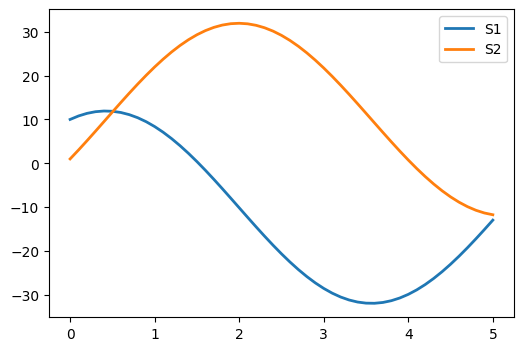

In [12]:
model = """
// This is an attempt to create an oscillator by controlling
// the eigenvalues of a network. The Jacobian should be:
//  0  -k1
//  k1  k1-k1
species S1, S2;
S1 -> S2; k1*S2
S2 -> 2 S2; k1*S1
S2 -> ; k1*S2
 -> S1; 10
 -> S2; 10

k1 = 1;
S1 = 10;
S2 = 1;

SS1 := S1 + 10
SS2 := S2 + 10
"""
rr = te.loada(model)
rr.getFullJacobian()
rr.simulate(selections=["time", "S1", "S2"])
rr.plot()